# Data analysis on COVID-19 data from "Protezione Civile"

Import statements.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Set the province and region of interest.

In [2]:
# set your province
provincia = 'TV'
# set your region
region = 'Veneto'

## 1. Province analysis

In [3]:
name = 'COVID-19/dati-province/dpc-covid19-ita-province.csv'
df_provincia = pd.read_csv(name)
df_provincia = df_provincia[df_provincia['sigla_provincia'] == provincia]
print(df_provincia.info())
print("min: %s max: %s" % (df_provincia['data'].min(), df_provincia['data'].max()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 123 to 54052
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   data                     380 non-null    object 
 1   stato                    380 non-null    object 
 2   codice_regione           380 non-null    int64  
 3   denominazione_regione    380 non-null    object 
 4   codice_provincia         380 non-null    int64  
 5   denominazione_provincia  380 non-null    object 
 6   sigla_provincia          380 non-null    object 
 7   lat                      380 non-null    float64
 8   long                     380 non-null    float64
 9   totale_casi              380 non-null    int64  
 10  note                     0 non-null      object 
 11  codice_nuts_1            54 non-null     object 
 12  codice_nuts_2            54 non-null     object 
 13  codice_nuts_3            54 non-null     object 
dtypes: float64(2), int64(3

Province information: total cases

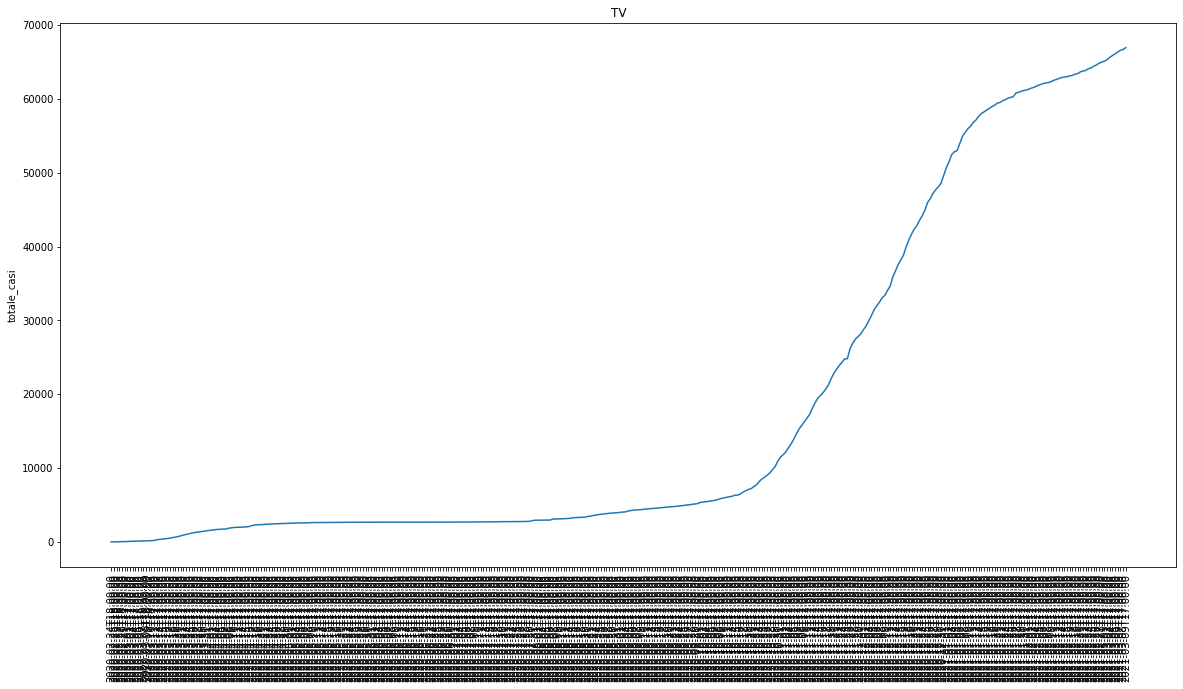

In [4]:
df_provincia = df_provincia[['data','totale_casi']]

plt.figure(figsize=(20,10))
plt.plot(df_provincia['data'],df_provincia['totale_casi'])
plt.xticks(rotation=90)
plt.title(provincia)
plt.ylabel("totale_casi")
plt.show()

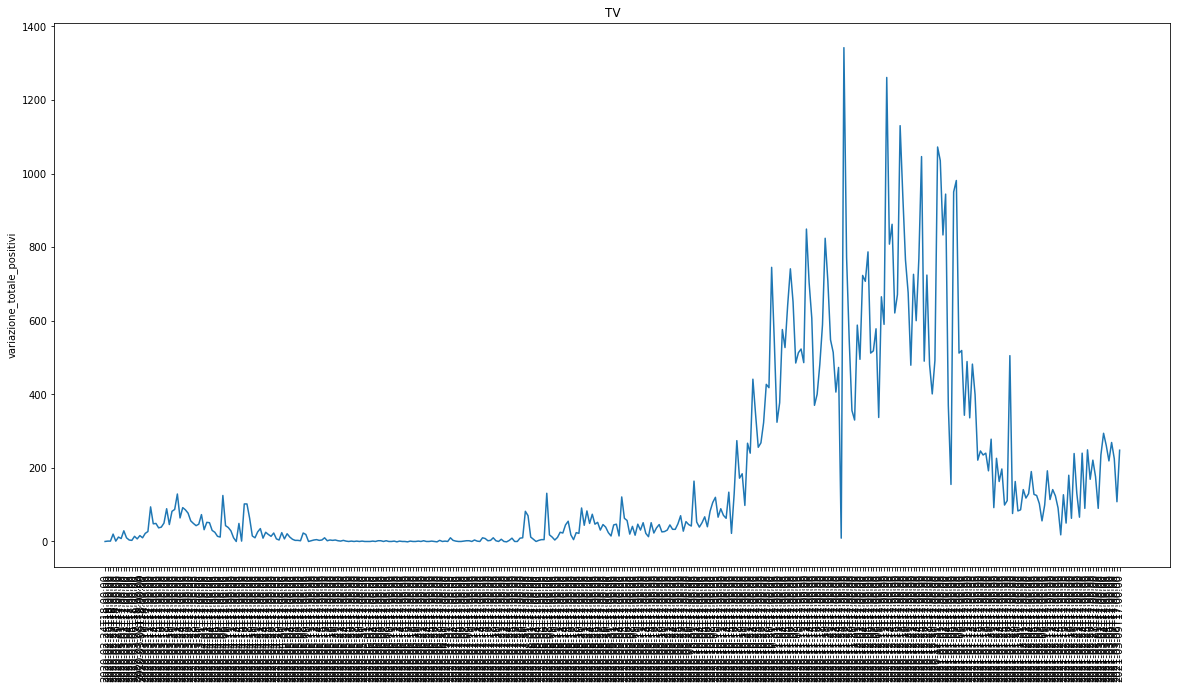

In [5]:
df_provincia['variazione_totale_positivi'] = (df_provincia['totale_casi'] - df_provincia['totale_casi'].shift(1).fillna(0))
plt.figure(figsize=(20,10))
plt.plot(df_provincia['data'],df_provincia['variazione_totale_positivi'])
plt.xticks(rotation=90)
plt.title(provincia)
plt.ylabel("variazione_totale_positivi")
plt.show()

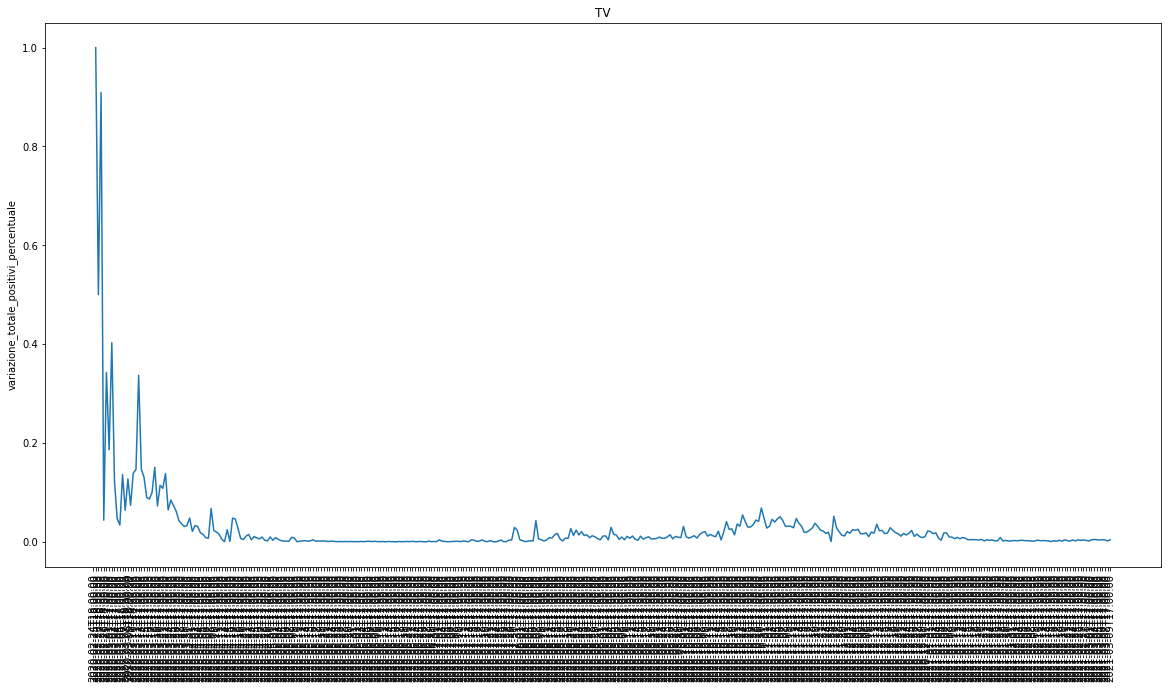

In [6]:
df_provincia['variazione_totale_positivi_percentuale'] = df_provincia['variazione_totale_positivi'] / df_provincia['totale_casi']
plt.figure(figsize=(20,10))
plt.plot(df_provincia['data'],df_provincia['variazione_totale_positivi_percentuale'])
plt.xticks(rotation=90)
plt.title(provincia)
plt.ylabel("variazione_totale_positivi_percentuale")
plt.show()

TODO: Add map by province, more graphs

## 2. Region analysis
Insert the region name below.

In [7]:
name = 'COVID-19/dati-regioni/dpc-covid19-ita-regioni.csv'
df_regioni = pd.read_csv(name)
df_regioni = df_regioni[df_regioni['denominazione_regione'] == region]
print(df_regioni.info())
print("min: %s max: %s" % (df_regioni['data'].min(), df_regioni['data'].max()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 20 to 7979
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   data                                    380 non-null    object 
 1   stato                                   380 non-null    object 
 2   codice_regione                          380 non-null    int64  
 3   denominazione_regione                   380 non-null    object 
 4   lat                                     380 non-null    float64
 5   long                                    380 non-null    float64
 6   ricoverati_con_sintomi                  380 non-null    int64  
 7   terapia_intensiva                       380 non-null    int64  
 8   totale_ospedalizzati                    380 non-null    int64  
 9   isolamento_domiciliare                  380 non-null    int64  
 10  totale_positivi                         380 non-null    int6

Region information.

In [8]:
# ricoverati_con_sintomi, terapia_intensiva, totale_ospedalizzati, isolamento_domiciliare, totale_positivi, variazione_totale_positivi, nuovi_positivi, dimessi_guariti, deceduti, totale_casi, tamponi
columns = ['data','totale_casi','tamponi', 'nuovi_positivi', 'dimessi_guariti', 'deceduti', 'totale_positivi', 'variazione_totale_positivi', 'ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati', 'isolamento_domiciliare']
df_regioni = df_regioni[columns]

The larger the organge area, the better.

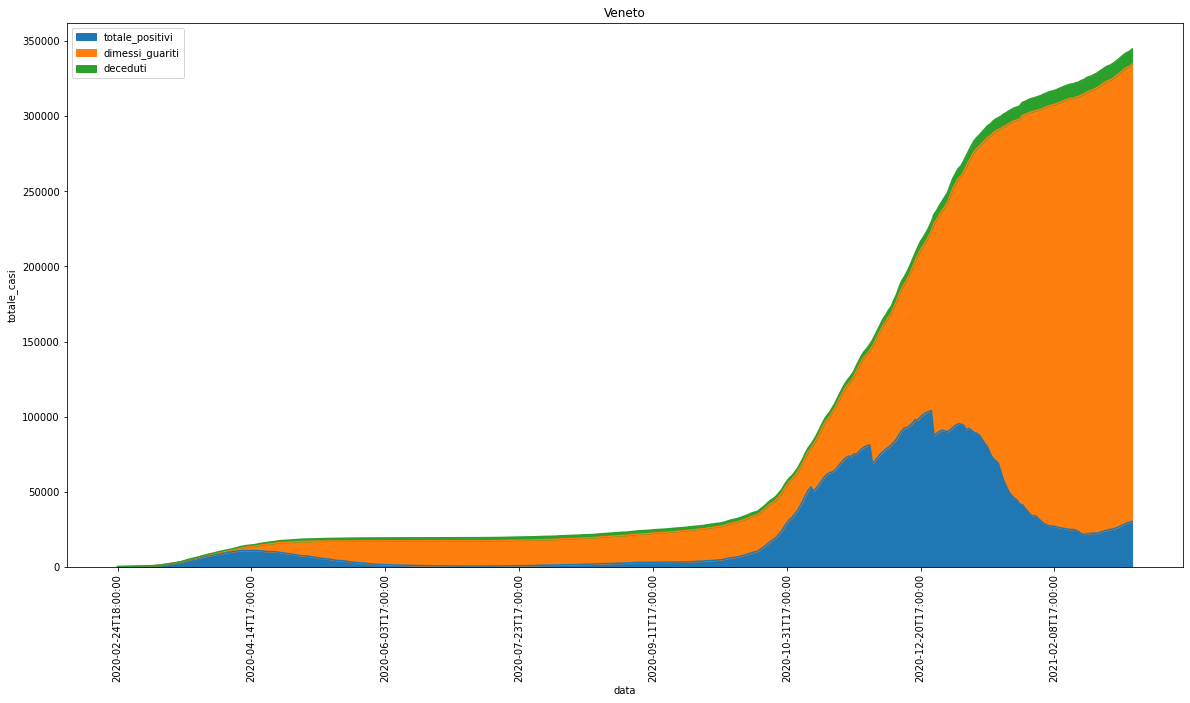

In [9]:
# totale_positivi = totale_casi - (dimessi_guariti + deceduti)
# totale_casi = totale_positivi + dimessi_guaridi + deceduti
df_positivi = df_regioni[['data', 'totale_positivi', 'dimessi_guariti', 'deceduti']]
df_positivi = df_positivi.set_index('data')
df_positivi.plot(kind='area', figsize=(20,10))
plt.ylabel("totale_casi")
plt.xticks(rotation=90)
plt.title(region)
plt.show()

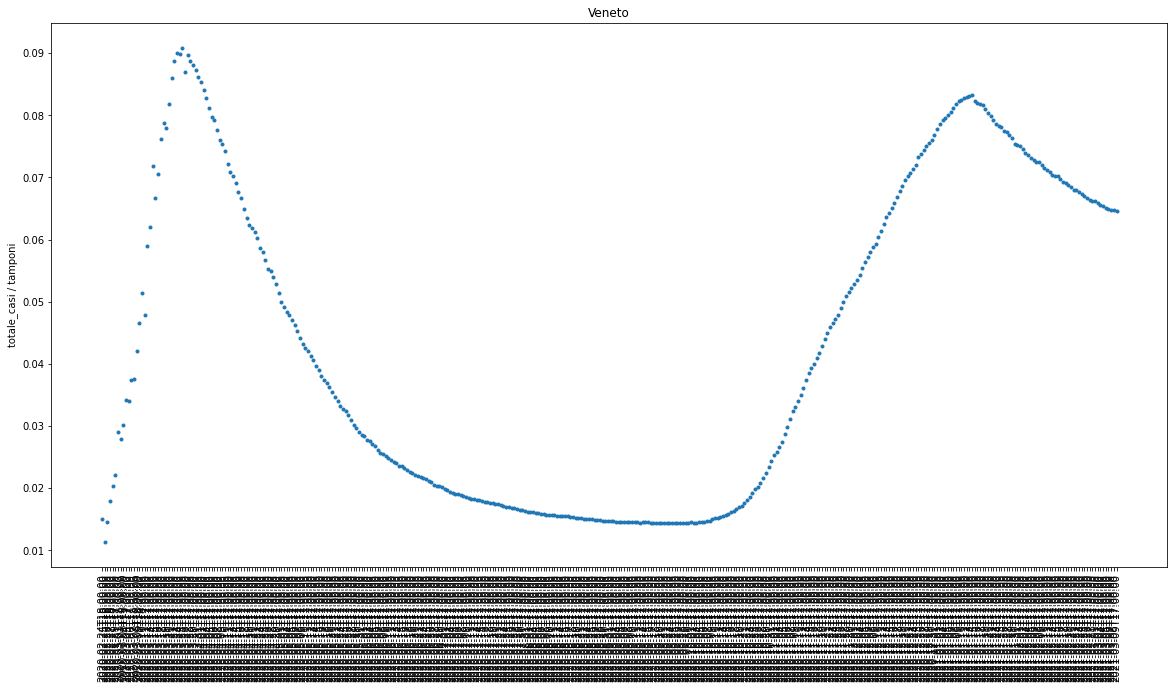

In [10]:
plt.figure(figsize=(20,10))
# df_tamponi = df_regioni[['totale_casi', 'tamponi']]
plt.plot(df_regioni['data'],df_regioni['totale_casi']/df_regioni['tamponi'],'.')
plt.xticks(rotation=90)
plt.title(region)
plt.ylabel("totale_casi / tamponi")
plt.show()

In [11]:
print(df_regioni['tamponi'][1:], df_regioni['tamponi'])

41         3780
62         4900
83         6164
104        7414
125        8659
         ...   
7895    5213735
7916    5255579
7937    5283403
7958    5293663
7979    5336942
Name: tamponi, Length: 379, dtype: int64 20         2200
41         3780
62         4900
83         6164
104        7414
         ...   
7895    5213735
7916    5255579
7937    5283403
7958    5293663
7979    5336942
Name: tamponi, Length: 380, dtype: int64


In [15]:
plt.figure(figsize=(20,10))
tamponi = df_regioni['tamponi'] - np.roll(df_regioni['tamponi'],1)
tamponi[20] = 0
df_regioni['tamponi_diff'] = np.diff(np.append(df_regioni['tamponi'],0))
pd.to_datetime(df_regioni['data'])
df_week = df_regioni.resample('W',on='data').sum()
plt.plot(df_week['tamponi_diff'][:-1],'.')
plt.xticks(rotation=90)
plt.title(region)
plt.ylabel("tamponi")
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

<Figure size 1440x720 with 0 Axes>

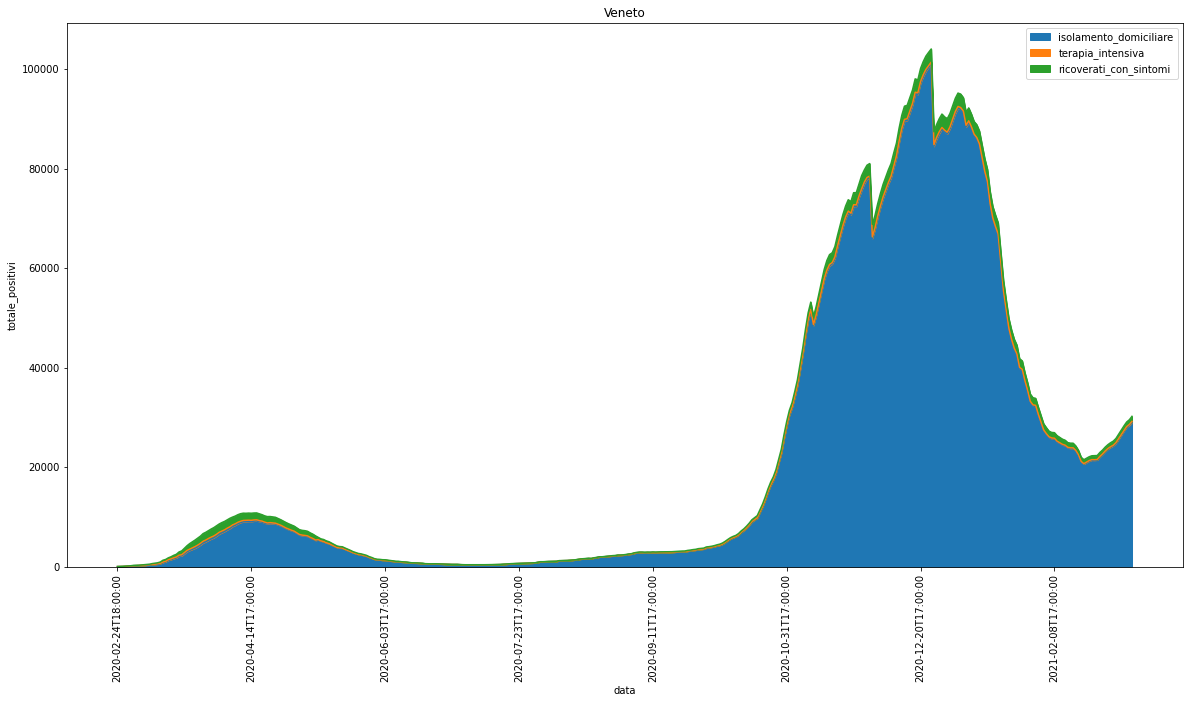

In [13]:
# totale_positivi = totale_ospedalizzati + isolamento_domiciliare
# totale_ospedalizzati = terapia_intensiva + ricoverati_con_sintomi
df_hospital = df_regioni[['data', 'isolamento_domiciliare', 'terapia_intensiva', 'ricoverati_con_sintomi']]
df_hospital = df_hospital.set_index('data')
df_hospital.plot(kind='area', figsize=(20,10))
plt.ylabel("totale_positivi")
plt.xticks(rotation=90)
plt.title(region)
plt.show()

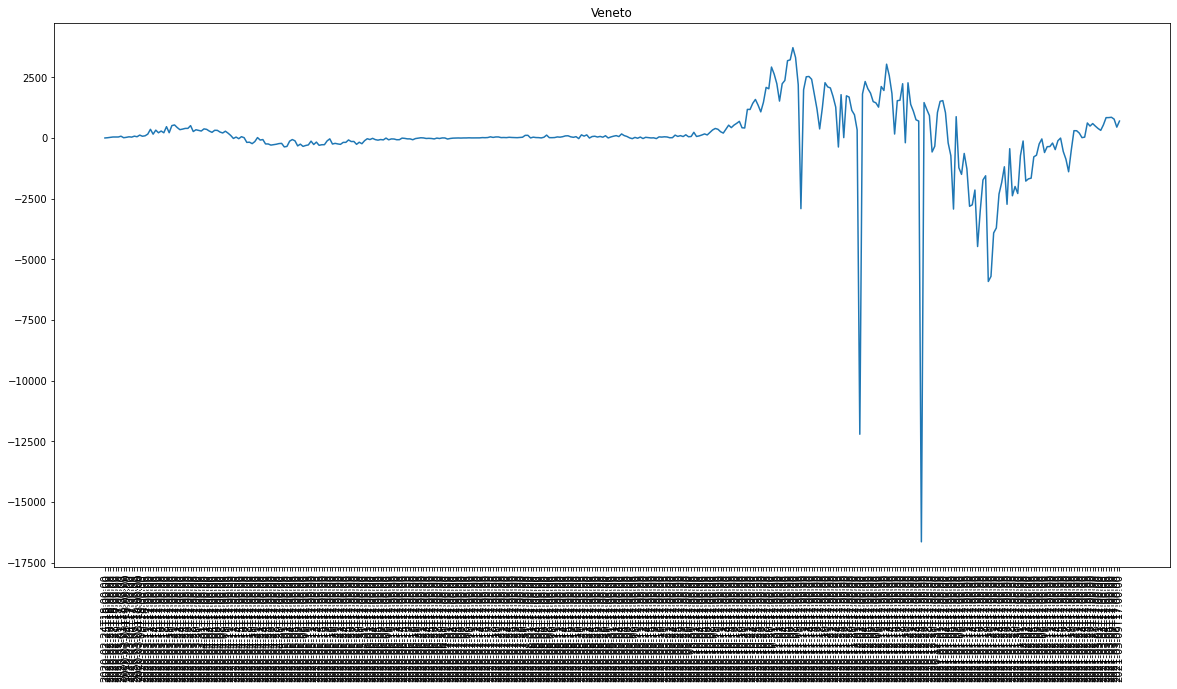

In [14]:
# Variazione del totale positivi (totale_positivi giorno corrente - totale_positivi giorno precedente)
plt.figure(figsize=(20,10))
plt.plot(df_regioni['data'],df_regioni['variazione_totale_positivi'])
plt.xticks(rotation=90)
plt.title(region)
plt.show()